In [1]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração de estilo
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Carregamento do dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projeto Semantix/global_energy_consumption.csv')

In [ ]:
# Visualização Inicial
print("Dimensões do dataset: ", df.shape)
print(df.head())

# Análise Descritiva
print("\nResumo estatístico das variáveis númericas: ")
print(df.describe())

print("\nTipos de dados: ")
print(df.dtypes)

Dimensões do dataset:  (10000, 10)
   Country  Year  Total Energy Consumption (TWh)  Per Capita Energy Use (kWh)  \
0   Canada  2018                         9525.38                     42301.43   
1  Germany  2020                         7922.08                     36601.38   
2   Russia  2002                         6630.01                     41670.20   
3   Brazil  2010                         8580.19                     10969.58   
4   Canada  2006                          848.88                     32190.85   

   Renewable Energy Share (%)  Fossil Fuel Dependency (%)  \
0                       13.70                       70.47   
1                       33.63                       41.95   
2                       10.82                       39.32   
3                       73.24                       16.71   
4                       73.60                       74.86   

   Industrial Energy Use (%)  Household Energy Use (%)  \
0                      45.18                     19.9

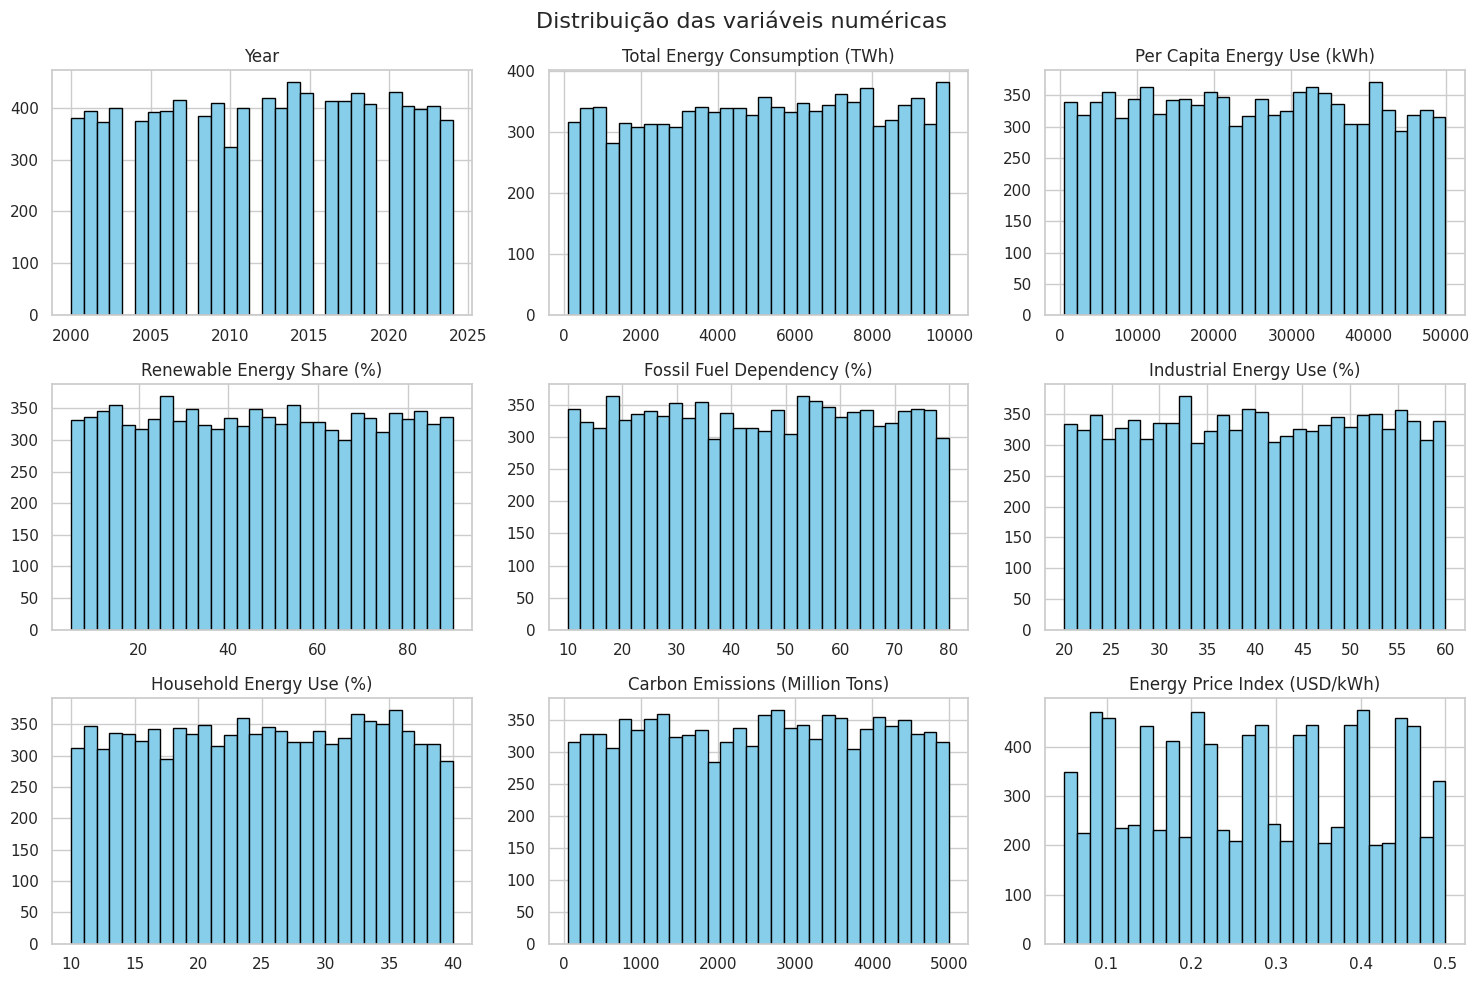

In [ ]:
# Visualizações Exploratórias

# Histograma das variáveis numéricas
df.hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Distribuição das variáveis numéricas', fontsize=16)
plt.tight_layout()
plt.show()

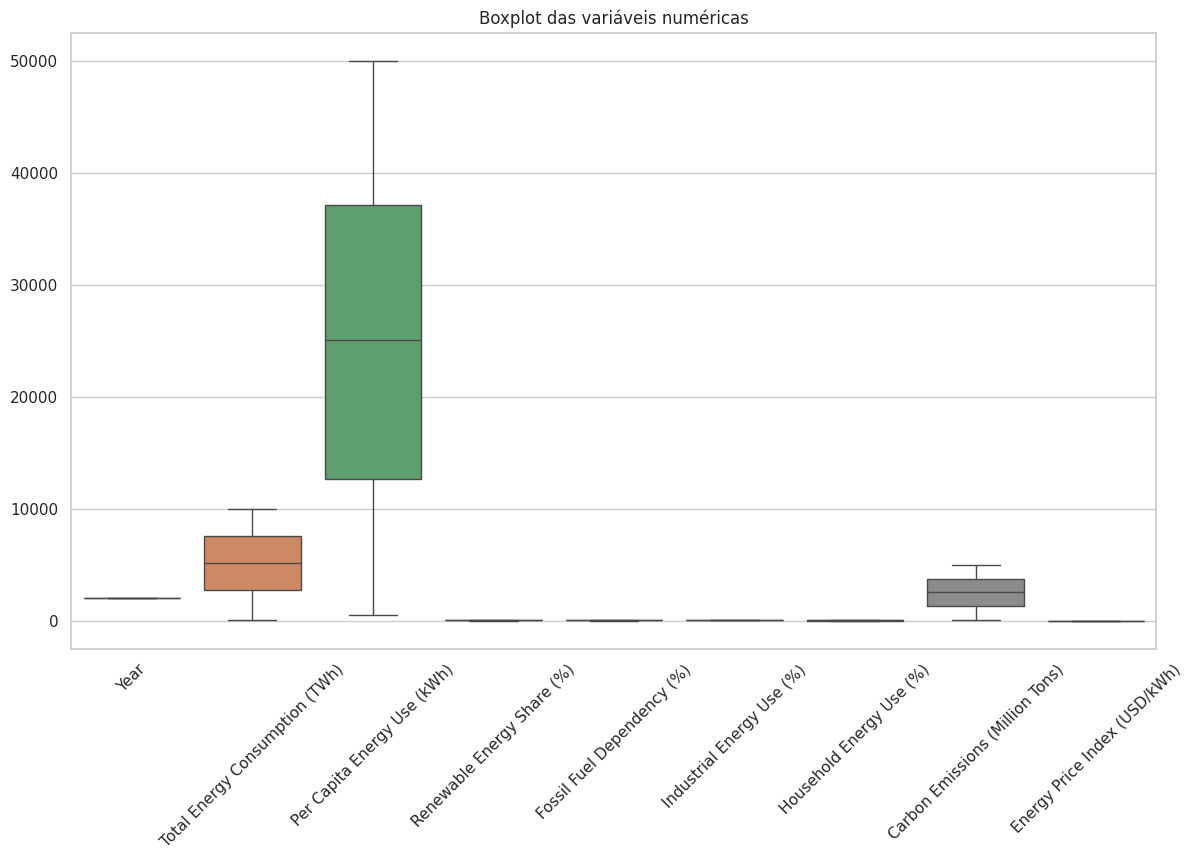

In [ ]:
# Boxplots
plt.figure(figsize=(14, 8))
sns.boxplot(data=df.select_dtypes(include='number'))
plt.xticks(rotation=45)
plt.title('Boxplot das variáveis numéricas')
plt.show()

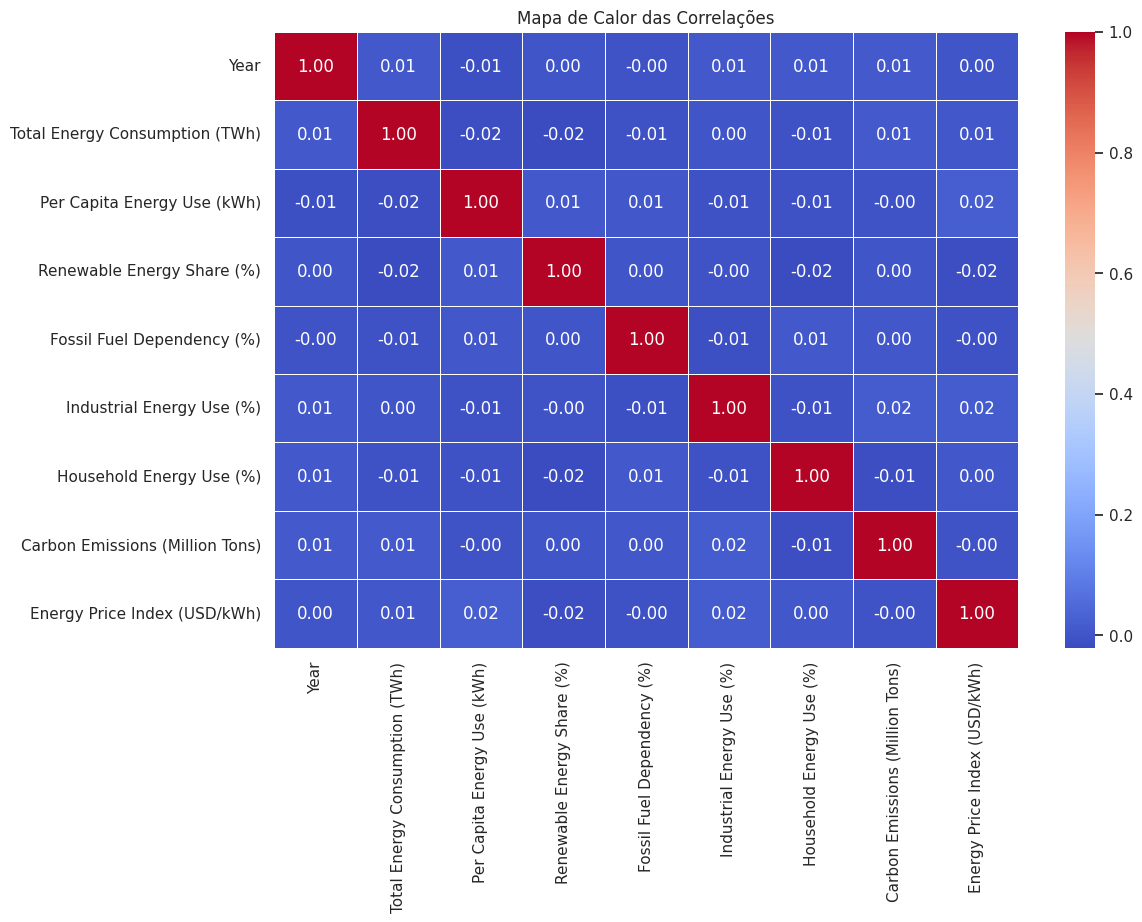

In [ ]:
# Análise de Correlação
correlation_matrix = df.corr(numeric_only=True)

# Heatmap de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Mapa de Calor das Correlações")
plt.show()

In [ ]:
# Correlação com a variável de Emissões de Carbono
target_var = 'Carbon Emissions (Million Tons)'
target_corr = correlation_matrix[target_var].sort_values(ascending=False)
print(f"\nCorrelação com {target_var}:")
print(target_corr)


Correlação com Carbon Emissions (Million Tons):
Carbon Emissions (Million Tons)    1.000000
Industrial Energy Use (%)          0.017964
Total Energy Consumption (TWh)     0.013643
Year                               0.013437
Fossil Fuel Dependency (%)         0.004444
Renewable Energy Share (%)         0.001108
Per Capita Energy Use (kWh)       -0.002527
Energy Price Index (USD/kWh)      -0.002696
Household Energy Use (%)          -0.013996
Name: Carbon Emissions (Million Tons), dtype: float64


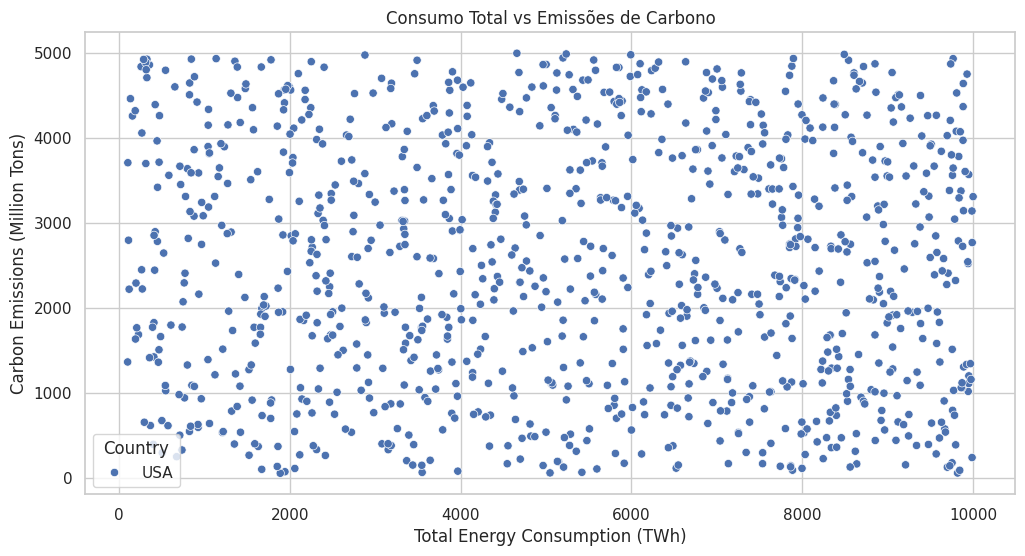

In [ ]:
# Visualização de relações importantes

# Definindo o país que será analisado
pais_selecionado = 'USA'
dados_pais = df[df['Country'] == pais_selecionado]

# Gráfico de dispersão entre consumo total e emissões
sns.scatterplot(data=df, x='Total Energy Consumption (TWh)', y=target_var, hue=dados_pais['Country'])
plt.title('Consumo Total vs Emissões de Carbono')
plt.show()

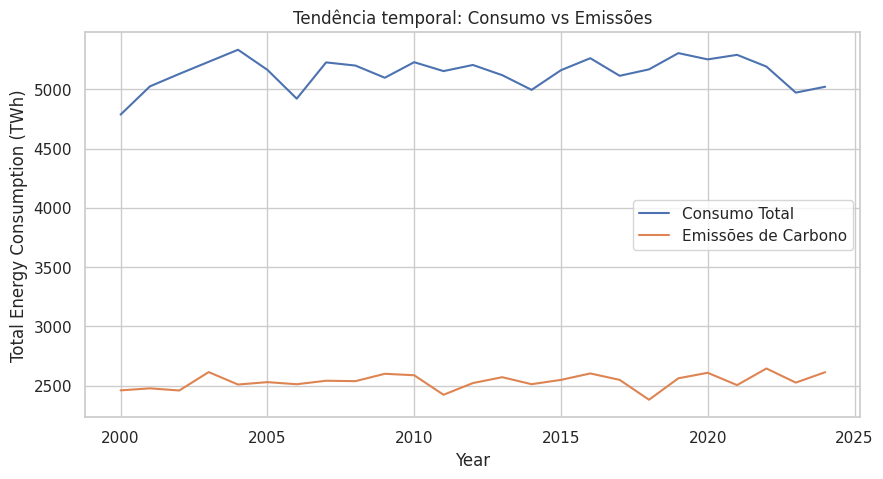

In [ ]:
# Tendência temporal (exemplo com média por ano)
df_grouped = df.groupby('Year').mean(numeric_only=True).reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_grouped, x='Year', y='Total Energy Consumption (TWh)', label='Consumo Total')
sns.lineplot(data=df_grouped, x='Year', y='Carbon Emissions (Million Tons)', label='Emissões de Carbono')
plt.title('Tendência temporal: Consumo vs Emissões')
plt.legend()
plt.show()

In [2]:
# Machine Learning (Regressão)
# Preparação dos dados
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Eliminar colunas categóricas não transformadas
df_ml = df.drop(columns=['Country'])

# Separar features e target para emissões de carbono
X_emissions = df_ml.drop(columns=['Carbon Emissions (Million Tons)'])
y_emissions = df_ml['Carbon Emissions (Million Tons)']

# Separar features e target para consumo de energia
X_consumption = df_ml.drop(columns=['Total Energy Consumption (TWh)'])
y_consumption = df_ml['Total Energy Consumption (TWh)']

In [3]:
# Modelo para prever Emissões de Carbono
X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(X_emissions, y_emissions, test_size=0.2, random_state=42)

model_emissions = RandomForestRegressor(random_state=42)
model_emissions.fit(X_train_e, y_train_e)
preds_emissions = model_emissions.predict(X_test_e)

# Avaliação do modelo de emissões
print("Previsão de Emissões de Carbono:")
print("RMSE:", np.sqrt(mean_squared_error(y_test_e, preds_emissions)))
print("R²:", r2_score(y_test_e, preds_emissions))

Previsão de Emissões de Carbono:
RMSE: 1459.0043797764304
R²: -0.04468978528650469


In [4]:
# Modelo para prever Consumo Total de Energia
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_consumption, y_consumption, test_size=0.2, random_state=42)

model_consumption = RandomForestRegressor(random_state=42)
model_consumption.fit(X_train_c, y_train_c)
preds_consumption = model_consumption.predict(X_test_c)

# Avaliação do modelo de consumo
print("\nPrevisão de Consumo Total de Energia:")
print("RMSE:", np.sqrt(mean_squared_error(y_test_c, preds_consumption)))
print("R²:", r2_score(y_test_c, preds_consumption))


Previsão de Consumo Total de Energia:
RMSE: 2839.753528555466
R²: -0.03209008074389308


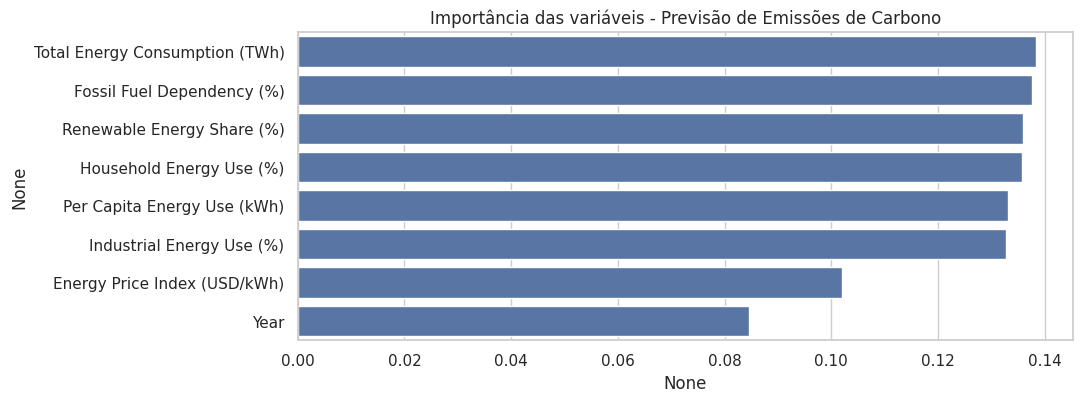

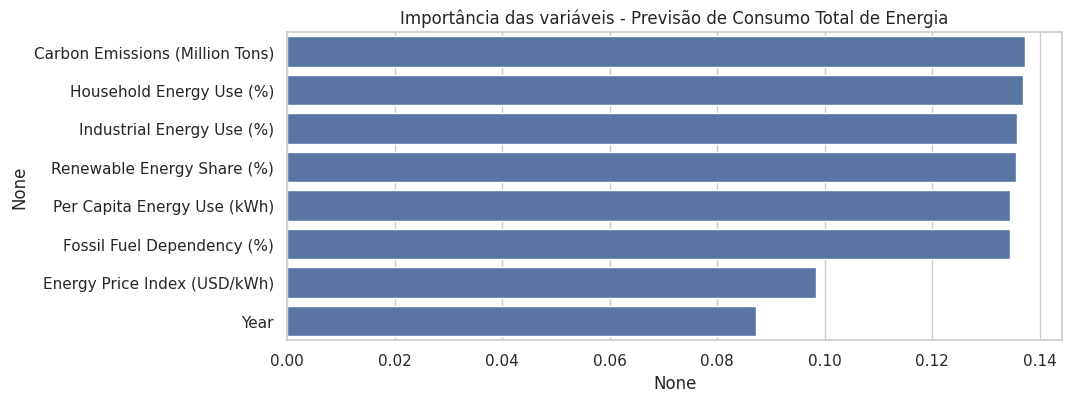

In [5]:
# Importância das variáveis
importances_emissions = pd.Series(model_emissions.feature_importances_, index=X_emissions.columns).sort_values(ascending=False)
importances_consumption = pd.Series(model_consumption.feature_importances_, index=X_consumption.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 4))
sns.barplot(x=importances_emissions, y=importances_emissions.index)
plt.title('Importância das variáveis - Previsão de Emissões de Carbono')
plt.show()

plt.figure(figsize=(10, 4))
sns.barplot(x=importances_consumption, y=importances_consumption.index)
plt.title('Importância das variáveis - Previsão de Consumo Total de Energia')
plt.show()